In [69]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
model = VGG16()
print(model.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [88]:
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
traindf=pd.read_csv('C:\\Users\\HP\\Downloads\\pests images model\\train.csv',dtype=str)
testdf=pd.read_csv('C:\\Users\\HP\\Downloads\\pests images model\\test.csv',dtype=str)
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)



In [89]:
import random
import os

traindf=pd.read_csv('C:\\Users\\HP\\Downloads\\pests images model\\train.csv',dtype=str)
traindf["filename"] = traindf["filename"].apply(os.path.basename)
# Save the updated DataFrame to a new CSV file
traindf.to_csv("train.csv", index=False)

testdf=pd.read_csv('C:\\Users\\HP\\Downloads\\pests images model\\test.csv',dtype=str)
testdf["filename"] = testdf["filename"].apply(os.path.basename)
# Save the updated DataFrame to a new CSV file
testdf.to_csv("test.csv", index=False)

In [90]:
traindf.head()

,filename,label
0,snail (317).jpg,snail
1,wasp (879).jpg,wasp
2,bees (383).jpg,bees
3,grasshopper (364).jpg,grasshopper
4,Weevil (161).jpg,weevil


In [91]:
train_generator=datagen.flow_from_dataframe(
validate_filenames=False,
dataframe=traindf,
directory="C:\\Users\\HP\\Downloads\\pests images model\\train",
x_col="filename",
y_col="label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))
valid_generator=datagen.flow_from_dataframe(
validate_filenames=False,
dataframe=traindf,
directory="C:\\Users\\HP\\Downloads\\pests images model\\train",
x_col="filename",
y_col="label",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
validate_filenames=False,
dataframe=testdf,
directory="C:\\Users\\HP\\Downloads\\pests images model\\test",
x_col="filename",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(32,32))

Found 3297 non-validated image filenames belonging to 12 classes.
Found 1098 non-validated image filenames belonging to 12 classes.
Found 1099 non-validated image filenames.


In [92]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [110]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=100
)

Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9032 - loss: 0.2998 - val_accuracy: 0.4357 - val_loss: 2.7427
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.9062 - loss: 0.2632 - val_accuracy: 0.3000 - val_loss: 4.9712
Epoch 3/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


103/103 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9091 - loss: 0.2772 - val_accuracy: 0.4099 - val_loss: 2.5606
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 1.0000 - loss: 0.0952 - val_accuracy: 0.4000 - val_loss: 3.6291
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9100 - loss: 0.2792 - val_accuracy: 0.4283 - val_loss: 2.6792
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.9375 - loss: 0.2461 - val_accuracy: 0.5000 - val_loss: 1.0008
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9008 - loss: 0.3121 - val_accuracy: 0.4393 - val_loss: 2.6754
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.8438 - loss: 0.3643 - val_accuracy: 0.2000 - val_loss: 3.8107
Epoch 9/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.9165 - loss: 0.2738 - val_accuracy: 0.4421 - val_loss: 2.6752
Epoch 10/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.9062 - loss: 0.2312 - val_acc

In [111]:
model.evaluate(valid_generator,
steps=STEP_SIZE_TEST)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4440 - loss: 2.7651


[2.9043304920196533, 0.4227941036224365]

In [121]:
model.save('my_model.h5')

In [112]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


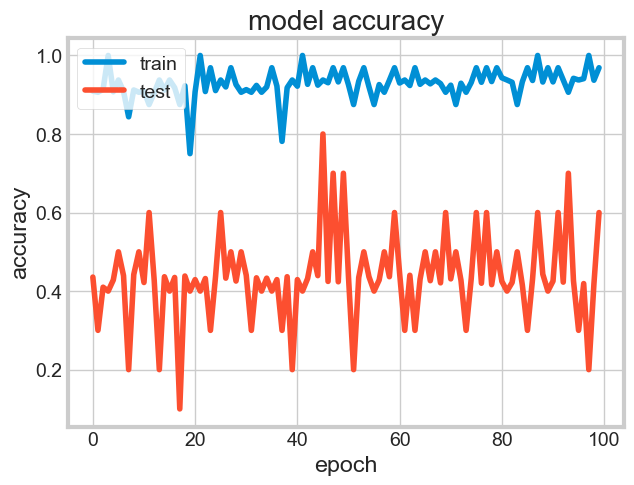

In [113]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

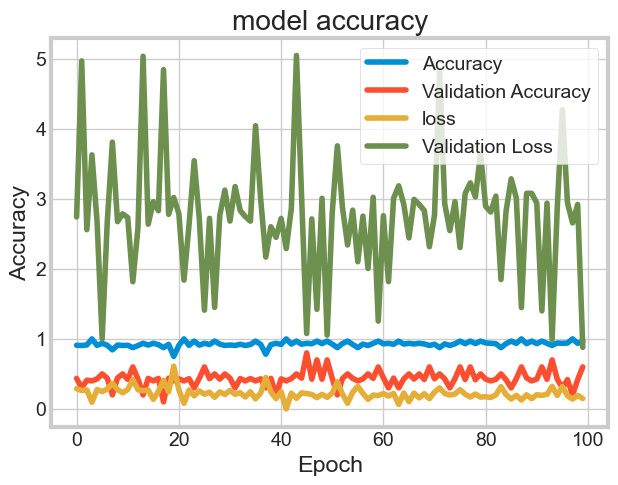

In [116]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from keras.preprocessing import image
img = image.load_img("C:\\Users\\HP\\Downloads\\68394.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("C:\\Users\\HP\\Downloads\\pests images model\\Model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("you have a pest")
else:
    print("you don't have a pest")